In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.ndimage.filters
import numpy.linalg
%matplotlib inline

In [2]:
filename = '/Users/forero/Illustris_data/WEB_CIC_256_DM_TNG300-3.hdf5'
f = h5py.File(filename, 'r')
print(f.keys())
density_smooth = f['density_smooth'][:,:,:]
lambda1 = f['lambda1'][:,:,:]
lambda2 = f['lambda2'][:,:,:]
lambda3 = f['lambda3'][:,:,:]
f.close()

<KeysViewHDF5 ['density_smooth', 'eigenvector1', 'eigenvector2', 'eigenvector3', 'hessian', 'lambda1', 'lambda2', 'lambda3', 'potential']>


7687255 2813307 151850


Text(0.5,1,'peak')

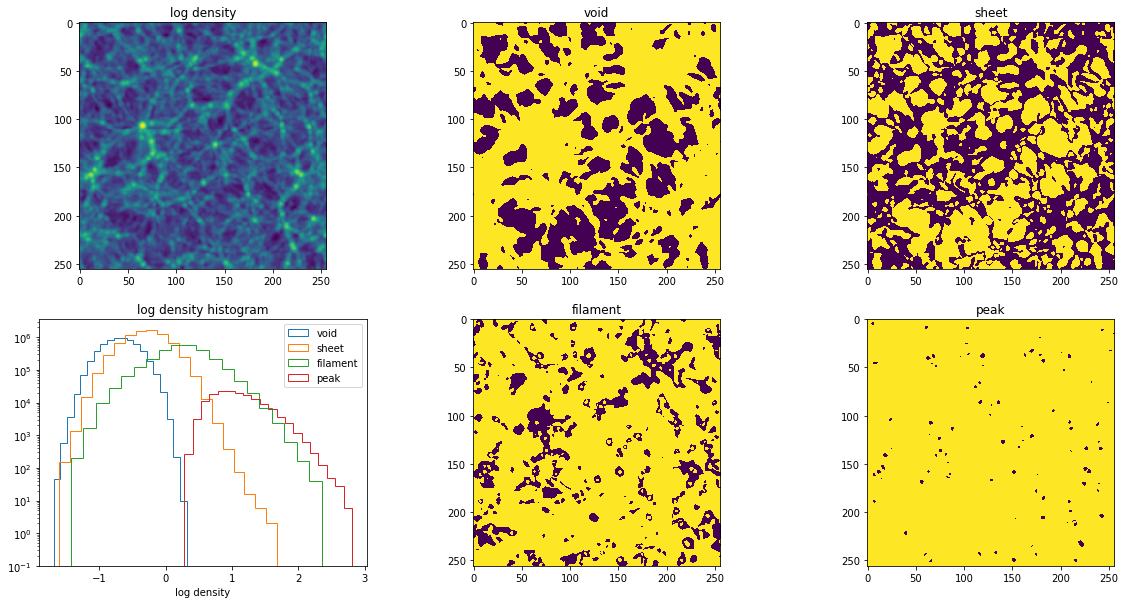

In [3]:
slice_id = 100

env_void = np.ones_like(density_smooth)
env_sheet = np.ones_like(density_smooth)
env_filament = np.ones_like(density_smooth)
env_peak = np.ones_like(density_smooth)


lambda_th = 0.2
ii_void = (lambda1<lambda_th) & (lambda2<lambda_th) & (lambda3<lambda_th)
ii_sheet = (lambda1>lambda_th) & (lambda2<lambda_th) & (lambda3<lambda_th)
ii_filament = (lambda1>lambda_th) & (lambda2>lambda_th) & (lambda3<lambda_th)
ii_peak = (lambda1>lambda_th) & (lambda2>lambda_th) & (lambda3>lambda_th)
print(np.count_nonzero(ii_sheet), np.count_nonzero(ii_filament), np.count_nonzero(ii_peak))

env_void[ii_void] = 0.0
env_sheet[ii_sheet] = 0.0
env_filament[ii_filament] = 0.0
env_peak[ii_peak] = 0.0


plt.figure(figsize=(20,10))


plt.subplot(2,3,1)
plt.imshow(np.log10(density_smooth[:,slice_id,:]+1))
plt.title('log density')


plt.subplot(2,3,2)
plt.imshow(env_void[:,slice_id,:])
plt.title('void')

plt.subplot(2,3,3)
plt.imshow(env_sheet[:,slice_id,:])
plt.title('sheet')


plt.subplot(2,3,4)
_ = plt.hist(np.log10(density_smooth[ii_void]+1.0), label='void', histtype='step', bins=20, log=True)
_ = plt.hist(np.log10(density_smooth[ii_sheet]+1.0), label='sheet', histtype='step', bins=20, log=True)
_ = plt.hist(np.log10(density_smooth[ii_filament]+1.0), label='filament', histtype='step', bins=20, log=True)
_ = plt.hist(np.log10(density_smooth[ii_peak]+1.0), label='peak', histtype='step', bins=20, log=True)
plt.legend()
plt.xlabel('log density')
plt.title('log density histogram')


plt.subplot(2,3,5)
plt.imshow(env_filament[:,slice_id,:])
plt.title('filament')


plt.subplot(2,3,6)
plt.imshow(env_peak[:,slice_id,:])
plt.title('peak')


In [5]:
FA = (1.0/np.sqrt(3.0))*np.sqrt(((lambda1-lambda2)**2 + (lambda1-lambda3)**2 + (lambda2-lambda3)**2)/(lambda1**2+lambda2**2+lambda3**2))
FA_flat = FA.flatten()

In [6]:
density_flat = density_smooth.flatten()

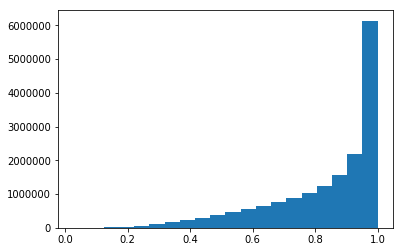

In [7]:
_ = plt.hist(FA_flat, bins=20)

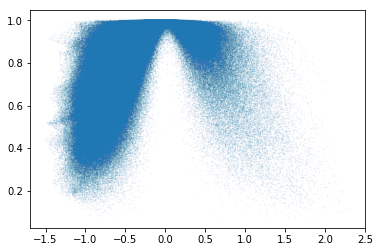

In [24]:
_=plt.scatter(np.log10(density_flat[:1000000]+1.0), FA_flat[:1000000], alpha=0.1, s=0.1)

In [58]:
trace = (lambda1+lambda2+lambda3)
np.count_nonzero(trace<-1.0)/len(FA_flat)
trace[trace<-1.0] = -0.9999999

In [59]:
alpha = np.sqrt(0.5*((lambda1-lambda2)**2 + (lambda1-lambda3)**2 + (lambda2-lambda3)**2))/(trace+1)
log_alpha_flat = np.log10(alpha.flatten())

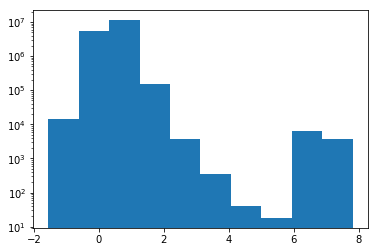

In [60]:
_ = plt.hist(alpha_flat, log=True)

(-1, 2)

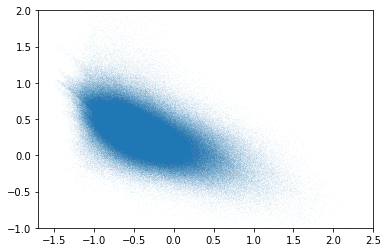

In [64]:
_=plt.scatter(np.log10(density_flat[:1000000]+1.0), log_alpha_flat[:1000000], alpha=0.1, s=0.01)
plt.ylim(-1,2)